# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Wildan Fadhil Nazaruddin
- **Email:** 232153079
- **ID Dicoding:** WILDAN FADHIL NAZARUDDIN

## Menentukan Pertanyaan Bisnis


- Bagaimana pola kualitas udara berubah dari tahun ke tahun di setiap stasiun pengukuran?
- Apakah ada perbedaan signifikan dalam tingkat pencemaran udara antara stasiun-stasiun pengukuran yang berbeda?
- Bagaimana pola polusi udara berdasarkan musim di Beijing?
- Apakah ada hubungan antara parameter cuaca (seperti suhu, kelembaban, dan presipitasi) dengan tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [54]:
pip install pandas

In [55]:
pip install pandas as pd

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [56]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [60]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

- 1 melihat semua data yang ada 

In [62]:
aotizhongxin_df = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
print("Isi dari dataframe aotizhongxin_df:")
print(aotizhongxin_df.head())

Isi dari dataframe aotizhongxin_df:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [63]:
changping_df = pd.read_csv('./data/PRSA_Data_Changping_20130301-20170228.csv')
print("isi dari direktori dataframe changping_df:")
print(changping_df.head())

isi dari direktori dataframe changping_df:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  


In [64]:
dingling_df = pd.read_csv('./data/PRSA_Data_Dingling_20130301-20170228.csv')
print("isi dari direktori dataframe dingling_df:")
print(dingling_df.head())

isi dari direktori dataframe dingling_df:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling  


In [65]:
dongsi_df = pd.read_csv('./data/PRSA_Data_Dongsi_20130301-20170228.csv')
print("isi direktori dongsi_df:")
print(dongsi_df.head())

isi direktori dongsi_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [66]:
guanyuan_df = pd.read_csv('./data/PRSA_Data_Guanyuan_20130301-20170228.csv')
print("isi direktori dingling_df:")
print(guanyuan_df.head())

isi direktori dingling_df:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan  


In [67]:
gucheng_df = pd.read_csv('./data/PRSA_Data_Gucheng_20130301-20170228.csv')
print("isi direktori dingling_df:")
print(gucheng_df.head())

isi direktori dingling_df:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng  


In [68]:
huairou_df = pd.read_csv('./data/PRSA_Data_Huairou_20130301-20170228.csv')
print("isi direktori huairou_df:")
print(huairou_df.head())

isi direktori huairou_df:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou  


In [69]:
nongzhanguan_df = pd.read_csv('./data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
print("isi direktori nongzhanguan_df:")
print(nongzhanguan_df.head())

isi direktori nongzhanguan_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan  


In [70]:
shunyi_df = pd.read_csv('./data/PRSA_Data_Shunyi_20130301-20170228.csv')
print("isi direktori shunyi_df:")
print(shunyi_df.head())

isi direktori shunyi_df:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi  


In [71]:
tiantan_df = pd.read_csv('./data/PRSA_Data_Tiantan_20130301-20170228.csv')
print("isi direktori tiantan_df:")
print(tiantan_df.head())

isi direktori tiantan_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  


In [72]:
wanliu_df = pd.read_csv('./data/PRSA_Data_Wanliu_20130301-20170228.csv')
print("isi direktori wanliu_df:")
print(wanliu_df.head())

isi direktori wanliu_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  


In [73]:
dingling_df = pd.read_csv('./data/PRSA_Data_Dingling_20130301-20170228.csv')
print("isi direktori dingling_df:")
print(dingling_df.head())

isi direktori dingling_df:
   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling  


In [74]:
wanshouxigong_df = pd.read_csv('./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
print("isi direktori wanshouxigong_df:")
print(wanshouxigong_df.head())

isi direktori wanshouxigong_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  


In [75]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


## Assessing Data

- cek data null

In [76]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, 
              nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]

for df in dataframes:

    df_name = [k for k, v in locals().items() if v is df][0]  
    print(f"NaN counts in {df_name}:")
    print(df.isna().sum())
    print("\n")

NaN counts in aotizhongxin_df:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


NaN counts in changping_df:
No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


NaN counts in dingling_df:
No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


NaN c

cek data nul colom rain pada data aotizhongxin_df

In [77]:
df_nan = aotizhongxin_df[aotizhongxin_df["PM10"].isna()] 
df_nan

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,205,2013,3,9,12,78.0,NaN,10.0,10.0,300.0,68.0,12.4,1004.3,-14.4,0.0,NW,7.9,Aotizhongxin
2949,2950,2013,7,1,21,85.0,NaN,12.0,79.0,2100.0,4.0,24.0,990.3,23.3,5.7,N,0.6,Aotizhongxin
3133,3134,2013,7,9,13,52.0,NaN,6.0,50.0,700.0,48.0,23.7,997.9,22.9,2.2,NE,1.4,Aotizhongxin
4513,4514,2013,9,5,1,24.0,NaN,1.0,35.0,400.0,49.0,17.9,1009.6,17.6,1.1,NNE,1.0,Aotizhongxin
4706,4707,2013,9,13,2,61.0,NaN,2.0,35.0,500.0,54.0,18.9,1002.3,17.4,0.0,SSW,1.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


<sup> karena melihat nilai nan dari rain sedikit dan nilainya kebanyakan 0 </sup>

In [78]:
aotizhongxin_df.loc[aotizhongxin_df["RAIN"] == 0 , "RAIN"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
35059    0.0
35060    0.0
35061    0.0
35062    0.0
35063    0.0
Name: RAIN, Length: 33664, dtype: float64

   - cek colom yang nan untuk mempermudah mengambil keputusan

In [79]:
aotizhongxin_df.iloc[16745:16750]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16745,16746,2015,1,27,17,11.0,11.0,11.0,13.0,700.0,54.0,2.0,1027.0,-22.0,0.0,NE,2.3,Aotizhongxin
16746,16747,2015,1,27,18,18.0,24.0,12.0,51.0,900.0,22.0,0.0,1027.0,-20.9,0.0,NE,1.2,Aotizhongxin
16747,16748,2015,1,27,19,20.0,33.0,11.0,74.0,1200.0,3.0,-5.2,1030.5,-21.3,0.0,W,0.4,Aotizhongxin
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
16749,16750,2015,1,27,21,35.0,48.0,23.0,76.0,1300.0,2.0,-7.0,1029.0,-19.3,0.0,ESE,0.4,Aotizhongxin


melihat rentang nilai untuk menemtukan interpolasi data 

memeriksa distribusi nilai pada pm2,5 

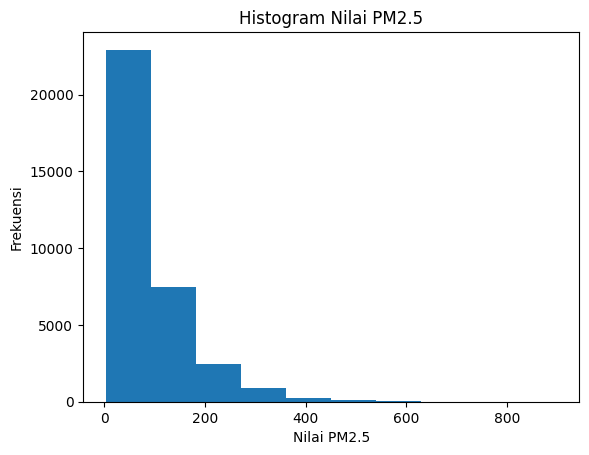

In [80]:
plt.hist(aotizhongxin_df['PM2.5'])
plt.xlabel('Nilai PM2.5')
plt.ylabel('Frekuensi')
plt.title('Histogram Nilai PM2.5')
plt.show()

In [81]:
print(aotizhongxin_df['PM2.5'].describe())

count    34139.000000
mean        82.773611
std         82.135694
min          3.000000
25%         22.000000
50%         58.000000
75%        114.000000
max        898.000000
Name: PM2.5, dtype: float64


In [82]:
print(aotizhongxin_df['PM2.5'].skew())
print(aotizhongxin_df['PM2.5'].kurtosis())

1.9660679396858887
5.574171286984195


## Cleaning Data

- mengubah data menjadi date time untuk semua data frame

In [84]:
def combine_datetime(df):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Mengubah tipe data kolom yang sesuai
def convert_dtypes(df):
    df['wd'] = df['wd'].astype('category')
    df['station'] = df['station'].astype('category')

# Iterasi melalui setiap dataframe dalam list
for df in dataframes:
    combine_datetime(df)
    convert_dtypes(df)

# Memeriksa tipe data untuk memastikan perubahan sudah dilakukan
for df in dataframes:
    print(f"Tipe data di {df['station'].iloc[0]}:")
    print(df.dtypes)
    print("\n")

Tipe data di Aotizhongxin:
No                   int64
PM2.5              float64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
TEMP               float64
PRES               float64
DEWP               float64
RAIN               float64
wd                category
WSPM               float64
station           category
datetime    datetime64[ns]
dtype: object


Tipe data di Changping:
No                   int64
PM2.5              float64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
TEMP               float64
PRES               float64
DEWP               float64
RAIN               float64
wd                category
WSPM               float64
station           category
datetime    datetime64[ns]
dtype: object


Tipe data di Dingling:
No                   int64
PM2.5              float64
PM10               float64
SO2

1. menghilangkan nilai nan pada data aotizhi colom rain
  

In [108]:
aotizhongxin_df.replace({"RAIN": {np.nan: 0}}, inplace=True)
#menggunakan metode back fill untuk mengisi nilai nan pada rain
aotizhongxin_df['PM2.5'] = aotizhongxin_df['PM2.5'].fillna(method='bfill')
# menggunakan metode forward fill pada coloms pm10
aotizhongxin_df['PM10'] = aotizhongxin_df['PM10'].fillna(method='ffill')
#menggunakan metode nilai yang sering muncul
aotizhongxin_df['SO2'] = aotizhongxin_df['SO2'].fillna(aotizhongxin_df['SO2'].mode()[0])
aotizhongxin_df['TEMP'] = aotizhongxin_df['TEMP'].fillna(aotizhongxin_df['TEMP'].mode()[0])
aotizhongxin_df['NO2'] = aotizhongxin_df['NO2'].fillna(method='ffill')
aotizhongxin_df['PRES'] = aotizhongxin_df['PRES'].fillna(method='ffill')
aotizhongxin_df['CO'] = aotizhongxin_df['CO'].fillna(method='bfill')
aotizhongxin_df['DEWP'] = aotizhongxin_df['DEWP'].fillna(aotizhongxin_df['DEWP'].mode()[0])
aotizhongxin_df['wd'] = aotizhongxin_df['wd'].fillna(aotizhongxin_df['wd'].mode()[0])
aotizhongxin_df['WSPM'] = aotizhongxin_df['WSPM'].fillna(aotizhongxin_df['WSPM'].mode()[0])

In [102]:
aotizhongxin_df['O3'] = df['O3'].fillna(aotizhongxin_df['O3'].median())

In [111]:
print("NaN counts in aotizhongxin_df:")
print(aotizhongxin_df.isna().sum())

NaN counts in aotizhongxin_df:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


- 1.2 menghilangkan nilai nan pada data changping
  - menggunakan beberapa metode seperti media dll 

In [119]:
changping_df.replace({"RAIN": {np.nan: 0}}, inplace=True)
#menggunakan metode back fill untuk mengisi nilai nan pada rain
changping_df['PM2.5'] = changping_df['PM2.5'].fillna(method='bfill')
# menggunakan metode forward fill pada coloms pm10
changping_df['PM10'] = changping_df['PM10'].fillna(method='ffill')
#menggunakan metode nilai yang sering muncul
changping_df['SO2'] = changping_df['SO2'].fillna(changping_df['SO2'].mode()[0])
changping_df['TEMP'] = changping_df['TEMP'].fillna(changping_df['TEMP'].mode()[0])
changping_df['NO2'] = changping_df['NO2'].fillna(method='ffill')
changping_df['PRES'] = changping_df['PRES'].fillna(method='ffill')
changping_df['CO'] = changping_df['CO'].fillna(method='bfill')
changping_df['DEWP'] = changping_df['DEWP'].fillna(changping_df['DEWP'].mode()[0])
changping_df['wd'] = changping_df['wd'].fillna(changping_df['wd'].mode()[0])
changping_df['WSPM'] = changping_df['WSPM'].fillna(changping_df['WSPM'].mode()[0])
changping_df['O3'] = df['O3'].fillna(changping_df['O3'].median())

In [120]:
print("NaN counts in aotizhongxin_df:")
print(changping_df.isna().sum())

NaN counts in aotizhongxin_df:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


In [114]:
changping_df[aotizhongxin_df.isna().any(axis=1)]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime


In [121]:
dataframes = [dingling_df , dongsi_df , guanyuan_df , gucheng_df , huairou_df ,nongzhanguan_df , shunyi_df , tiantan_df , wanliu_df , wanshouxigong_df]  # Tambahkan DataFrame lainnya ke dalam daftar

def fill_na_all(df_list):
    for df in df_list:
        df.replace({"RAIN": {np.nan: 0}}, inplace=True)
        df['PM2.5'] = df['PM2.5'].fillna(method='bfill')
        df['PM10'] = df['PM10'].fillna(method='ffill')
        df['SO2'] = df['SO2'].fillna(df['SO2'].mode()[0])
        df['TEMP'] = df['TEMP'].fillna(df['TEMP'].mode()[0])
        df['NO2'] = df['NO2'].fillna(method='ffill')
        df['PRES'] = df['PRES'].fillna(method='ffill')
        df['CO'] = df['CO'].fillna(method='bfill')
        df['DEWP'] = df['DEWP'].fillna(df['DEWP'].mode()[0])
        df['wd'] = df['wd'].fillna(df['wd'].mode()[0])
        df['WSPM'] = df['WSPM'].fillna(df['WSPM'].mode()[0])
        df['O3'] = df['O3'].fillna(df['O3'].median())

# Menerapkan fungsi ke semua DataFrame dalam daftar
fill_na_all(dataframes)

# Menampilkan hasil DataFrame setelah mengisi nilai NaN
for df in dataframes:
    print(df)

          No  PM2.5  PM10  SO2  NO2     CO     O3  TEMP    PRES  DEWP  RAIN  \
0          1    4.0   4.0  3.0  NaN  200.0   82.0  -2.3  1020.8 -19.7   0.0   
1          2    7.0   7.0  3.0  NaN  200.0   80.0  -2.5  1021.3 -19.0   0.0   
2          3    5.0   5.0  3.0  2.0  200.0   79.0  -3.0  1021.3 -19.9   0.0   
3          4    6.0   6.0  3.0  2.0  200.0   79.0  -3.6  1021.8 -19.1   0.0   
4          5    5.0   5.0  3.0  2.0  200.0   81.0  -3.5  1022.3 -19.4   0.0   
...      ...    ...   ...  ...  ...    ...    ...   ...     ...   ...   ...   
35059  35060   11.0  11.0  2.0  2.0  200.0   99.0  11.7  1008.9 -13.3   0.0   
35060  35061   13.0  13.0  2.0  2.0  200.0  101.0  10.9  1009.0 -14.0   0.0   
35061  35062    9.0  14.0  2.0  2.0  200.0  102.0   9.5  1009.4 -13.0   0.0   
35062  35063   10.0  12.0  2.0  2.0  200.0   97.0   7.8  1009.6 -12.6   0.0   
35063  35064   13.0  16.0  4.0  9.0  500.0   74.0   7.0  1009.4 -12.2   0.0   

        wd  WSPM   station            datetime  
0 

In [122]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, 
              nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]

for df in dataframes:

    df_name = [k for k, v in locals().items() if v is df][0]  
    print(f"NaN counts in {df_name}:")
    print(df.isna().sum())
    print("\n")

NaN counts in aotizhongxin_df:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


NaN counts in ___:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


NaN counts in dingling_df:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         2
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


NaN counts in dongsi_df:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [123]:
aotizhongxin_df['year'] = aotizhongxin_df['datetime'].dt.year

In [124]:
aotizhongxin_df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,year
0,1,4.0,4.0,4.0,7.0,300.0,62.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,2013
1,2,8.0,8.0,4.0,7.0,300.0,66.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,2013
2,3,7.0,7.0,5.0,10.0,300.0,59.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,2013
3,4,6.0,6.0,11.0,11.0,300.0,42.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,2013
4,5,3.0,3.0,12.0,12.0,300.0,36.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,2013


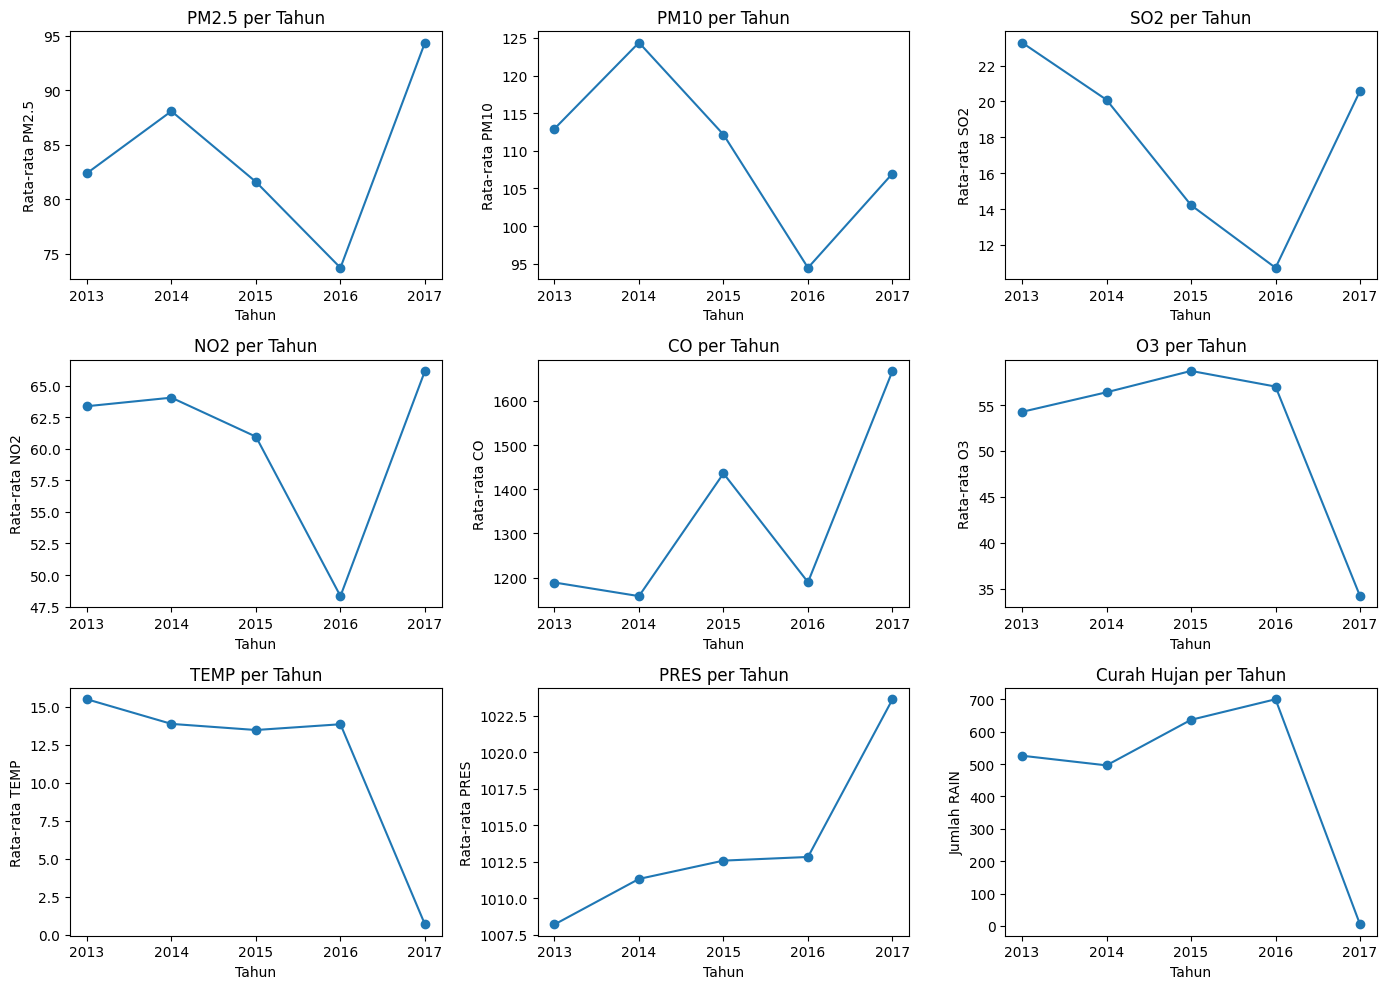

In [125]:
yearly_avg = aotizhongxin_df.groupby('year').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'sum',  # Jumlah curah hujan per tahun
    'wd': lambda x: x.mode().iloc[0],  # Mode arah angin
    'WSPM': 'mean'
}).reset_index()
# Membuat plot untuk masing-masing parameter kualitas udara
plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
plt.plot(yearly_avg['year'], yearly_avg['PM2.5'], marker='o')
plt.title('PM2.5 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')

plt.subplot(3, 3, 2)
plt.plot(yearly_avg['year'], yearly_avg['PM10'], marker='o')
plt.title('PM10 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM10')

plt.subplot(3, 3, 3)
plt.plot(yearly_avg['year'], yearly_avg['SO2'], marker='o')
plt.title('SO2 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata SO2')

plt.subplot(3, 3, 4)
plt.plot(yearly_avg['year'], yearly_avg['NO2'], marker='o')
plt.title('NO2 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata NO2')

plt.subplot(3, 3, 5)
plt.plot(yearly_avg['year'], yearly_avg['CO'], marker='o')
plt.title('CO per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata CO')

plt.subplot(3, 3, 6)
plt.plot(yearly_avg['year'], yearly_avg['O3'], marker='o')
plt.title('O3 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata O3')

plt.subplot(3, 3, 7)
plt.plot(yearly_avg['year'], yearly_avg['TEMP'], marker='o')
plt.title('TEMP per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata TEMP')

plt.subplot(3, 3, 8)
plt.plot(yearly_avg['year'], yearly_avg['PRES'], marker='o')
plt.title('PRES per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PRES')

plt.subplot(3, 3, 9)
plt.plot(yearly_avg['year'], yearly_avg['RAIN'], marker='o')
plt.title('Curah Hujan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah RAIN')

plt.tight_layout()
plt.show()


In [129]:
for df in dataframes:
    # Mengelompokkan data berdasarkan stasiun dan tahun, kemudian menghitung rata-rata PM2.5 per tahun
    df['year'] = df['datetime'].dt.year
    yearly_avg = df.groupby(['station', 'year'])['PM2.5'].mean().reset_index()
    
    # Tampilkan hasil rata-rata PM2.5 per tahun untuk DataFrame saat ini
    print(f"Yearly average PM2.5 for {df['station'].unique()}:")
    print(yearly_avg)
    print("\n")

# Gabungkan semua DataFrame dalam list dataframes menjadi satu DataFrame tunggal
combined_df = pd.concat(dataframes)

# Menghitung rata-rata PM2.5 per tahun untuk semua stasiun
yearly_avg_combined = combined_df.groupby(['station', 'year'])['PM2.5'].mean().reset_index()

# Tampilkan hasil rata-rata PM2.5 per tahun untuk semua stasiun yang telah digabungkan
print("Yearly average PM2.5 for all stations combined:")
print(yearly_avg_combined)

Yearly average PM2.5 for ['Aotizhongxin']
Categories (1, object): ['Aotizhongxin']:
        station  year      PM2.5
0  Aotizhongxin  2013  82.384259
1  Aotizhongxin  2014  88.081792
2  Aotizhongxin  2015  81.587900
3  Aotizhongxin  2016  73.700137
4  Aotizhongxin  2017  94.378531


Yearly average PM2.5 for ['Changping']
Categories (1, object): ['Changping']:
     station  year      PM2.5
0  Changping  2013  72.369009
1  Changping  2014  79.684395
2  Changping  2015  68.430297
3  Changping  2016  61.746357
4  Changping  2017  79.846045


Yearly average PM2.5 for ['Dingling']
Categories (1, object): ['Dingling']:
    station  year      PM2.5
0  Dingling  2013  64.401416
1  Dingling  2014  75.480320
2  Dingling  2015  64.301610
3  Dingling  2016  60.247723
4  Dingling  2017  68.301554


Yearly average PM2.5 for ['Dongsi']
Categories (1, object): ['Dongsi']:
  station  year       PM2.5
0  Dongsi  2013   86.764706
1  Dongsi  2014   87.718858
2  Dongsi  2015   87.210868
3  Dongsi  2016   79

### Pertanyaan 2:

# Conclusion

- conclusion 1